<a href="https://colab.research.google.com/github/Kartikgc9/Machine-Learning-Assignments/blob/main/Image_identificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Downloading keras datasets

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Checking the volume training data.

In [3]:
len(x_train)

60000

Checking the volume of testing data

In [4]:
len(x_test)

10000

The images in testing data are of size 28 x 28.

In [5]:
x_train[0].shape

(28, 28)

The color in the images are marked in the form of numbers lying between 0 to 255.Where 255 means white and 0 means black.

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

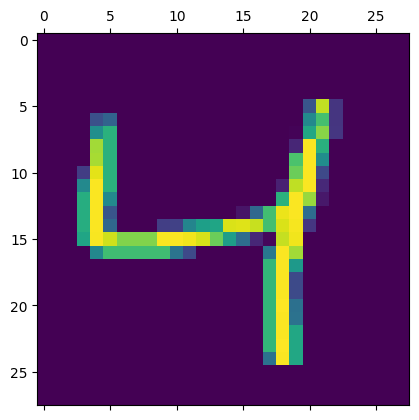

In [9]:
plt.matshow(x_train[2])

In [10]:
y_train[2]

4

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Scaling the data to get better accuracy.

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
x_train.shape

(60000, 28, 28)

Flattening the 28x28 data matrix to a flattend matrix of 1x1.

In [31]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [32]:
x_test_flattened.shape

(10000, 784)

In [34]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer='adam' ,
    loss ='sparse_categorical_crossentropy' ,
    metrics ='accuracy'
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9261


In [37]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9237


[0.2679511606693268, 0.9236999750137329]

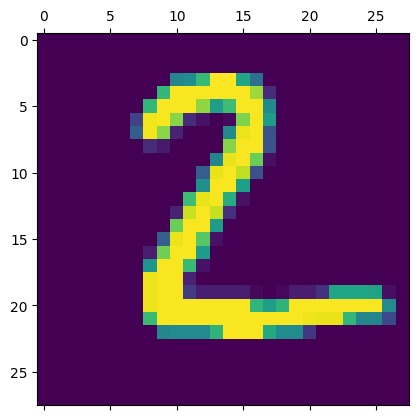

In [45]:
plt.matshow(x_test[1])

In [46]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([4.5323819e-01, 4.5219036e-03, 9.9922204e-01, 3.1018090e-01,
       4.4841117e-10, 8.5853666e-01, 8.6377794e-01, 1.0851912e-12,
       1.5384270e-01, 1.6297295e-09], dtype=float32)

In [51]:
np.argmax(y_predicted[1])

2

In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [60]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [61]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    0,    5,    4,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,   11,  920,   14,    8,    5,   12,   12,   38,    4],
       [   4,    0,   21,  911,    0,   34,    2,   13,   17,    8],
       [   1,    2,    3,    2,  910,    0,   11,    4,    9,   40],
       [  10,    3,    2,   28,    7,  787,   15,    6,   27,    7],
       [  15,    3,    6,    1,    7,   12,  910,    2,    2,    0],
       [   2,    8,   22,    4,    8,    0,    0,  953,    1,   30],
       [   8,   15,    5,   25,    9,   40,    9,   14,  841,    8],
       [  11,    7,    1,    9,   23,    7,    0,   25,    5,  921]],
      dtype=int32)>

This tells us about our predictions

Text(95.72222222222221, 0.5, 'Truth')

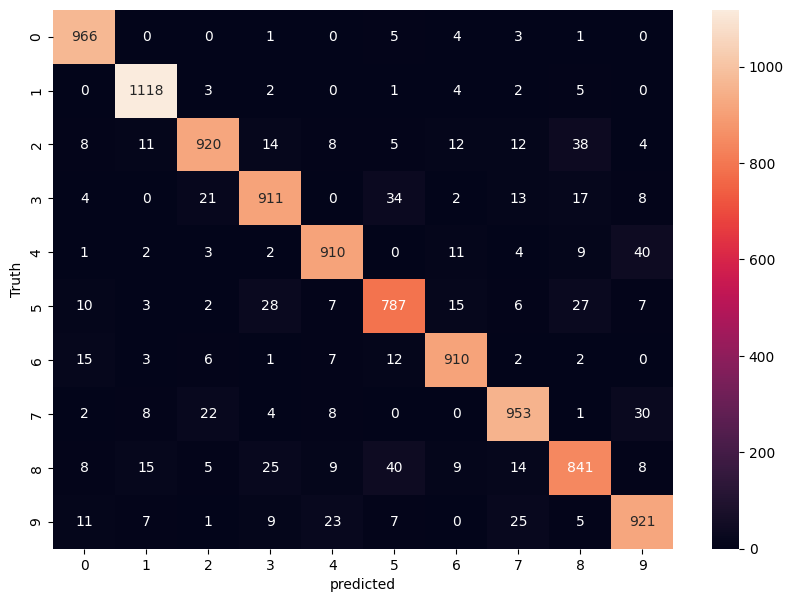

In [63]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot =True , fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [64]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam' ,
    loss ='sparse_categorical_crossentropy' ,
    metrics ='accuracy'
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2766 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1317 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0917 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0549 - accuracy: 0.9830


In [66]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0842 - accuracy: 0.9757


[0.08417239785194397, 0.9757000207901001]

313/313 [==============================] - 2s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

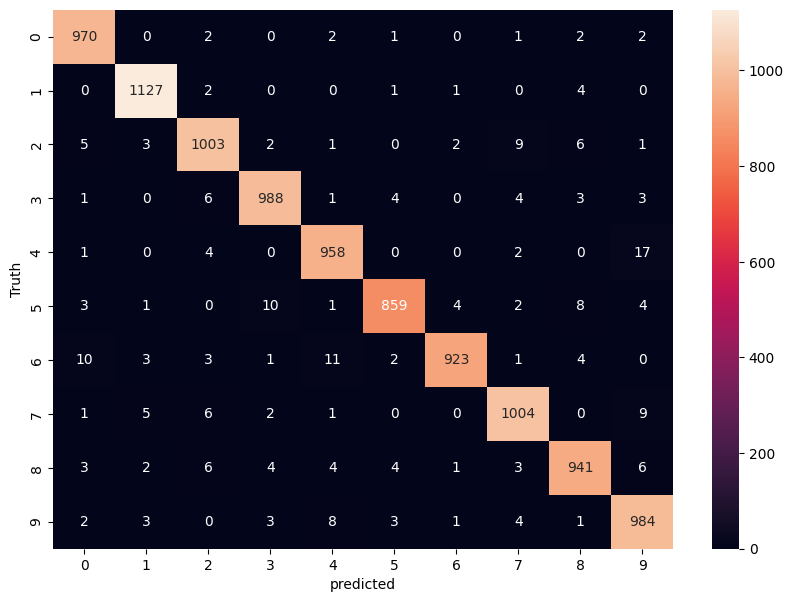

In [68]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam' ,
    loss ='sparse_categorical_crossentropy' ,
    metrics ='accuracy'
)

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9839
